# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [87]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ddevii/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [88]:
# Read your api key environment variable
from newsapi.newsapi_client import NewsApiClient
api_key = os.getenv("news_api")

In [89]:
# Create a newsapi client
news_api = NewsApiClient(api_key=api_key)

In [90]:
# Fetch the Bitcoin news articles
bitcoin_news = news_api.get_everything(q = "Bitcoin", language = "en", sort_by = "relevancy")


In [91]:
# Fetch the Ethereum news articles
ethereum_news = news_api.get_everything(q = "Ethereum", language = "en", sort_by = "relevancy")

In [92]:
# Create the Bitcoin sentiment scores DataFrame
bitcoin_sentiments = []

for news in bitcoin_news["articles"]:
    try:
        text = news["content"]
        date = news["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        passtext = news["content"]
        date = news["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
        
    except AttributeError:
        pass


In [93]:
# Create the Ethereum sentiment scores DataFrame
ethereum_sentiments = []

for news in ethereum_news["articles"]:
    try:
        text = news["content"]
        date = news["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        passtext = news["content"]
        date = news["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass

In [94]:
# Describe the Bitcoin Sentiment
bitcoin_news_df = pd.DataFrame(bitcoin_sentiments, columns=["date", "text", "compound", "positive", "negative", "neutral"])
bitcoin_news_df.head()

,date,text,compound,positive,negative,neutral
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
2,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836
3,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [95]:
# Describe the Ethereum Sentiment
ethereum_news_df = pd.DataFrame(ethereum_sentiments, columns=["date", "text", "compound", "positive", "negative", "neutral"])
ethereum_news_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
2,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954
3,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
4,2022-05-25,"DAVOS, Switzerland, May 25 (Reuters) - Ethereu...",0.0258,0.034,0.000,0.966


In [96]:
bitcoin_news_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.135985,0.052100,0.077500,0.870500
std,0.383417,0.058234,0.077527,0.103841
min,-0.859300,0.000000,0.000000,0.557000
25%,-0.411525,0.000000,0.030000,0.850750
50%,-0.199350,0.041500,0.071500,0.888500
75%,0.156025,0.077500,0.099250,0.924250
max,0.510600,0.202000,0.300000,1.000000


In [97]:
ethereum_news_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.050240,0.043400,0.047400,0.909350
std,0.409266,0.054028,0.053415,0.058679
min,-0.690800,0.000000,0.000000,0.803000
25%,-0.381800,0.000000,0.000000,0.863500
50%,-0.051350,0.017000,0.042500,0.923000
75%,0.181000,0.072750,0.079000,0.955000
max,0.690800,0.178000,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin had the highest mean positive score with 0.05870 while Ethereum has a mean positive score of0.05015

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score with a max of 0.69080

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score with a max of 0.20200

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [99]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re



In [100]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))


# Expand the default stopwords list if necessary
sw_addon = {'ha','u', 'say'}

In [103]:
def tokenizer(article):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', article)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addon)]
    return tokens

In [109]:
btc_tokenized = []
for text in bitcoin_news_df.text:
      
    words = []
    words = words + tokenizer(text)
    btc_tokenized.append(words)

bitcoin_news_df["tokens"] = btc_tokenized
bitcoin_news_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[new, york, lawmaker, passed, bill, would, tem..."
1,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, crypto, s..."
2,2022-06-05,"Image caption, President Faustin-Archange Toua...",0.5106,0.164,0.000,0.836,"[image, caption, president, faustinarchange, t..."
3,2022-06-02,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[reportedly, pay, burrito, taco, bitcoin, digi..."
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."


In [117]:
btc_tokenized_list = [item for elem in btc_tokenized for item in elem]
btc_tokenized_list[:5]

['new', 'york', 'lawmaker', 'passed', 'bill']

In [113]:
# Create a new tokens column for Ethereum
eth_tokenized = []
for text in ethereum_news_df.text:
      
    words = []
    words = words + tokenizer(text)
    eth_tokenized.append(words)

ethereum_news_df["tokens"] = eth_tokenized
ethereum_news_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, revealed, nfts, work, instagram, usbase..."
1,2022-05-23,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960,"[gamestop, officially, thrown, headlong, web, ..."
2,2022-05-23,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954,"[gamestop, going, allin, crypto, video, game, ..."
3,2022-06-03,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[new, york, lawmaker, passed, bill, would, tem..."
4,2022-05-25,"DAVOS, Switzerland, May 25 (Reuters) - Ethereu...",0.0258,0.034,0.000,0.966,"[davos, switzerland, may, reuters, ethereums, ..."


In [118]:
eth_tokenized_list = [item for elem in eth_tokenized for item in elem]
eth_tokenized_list[:5]

['meta', 'revealed', 'nfts', 'work', 'instagram']

---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [53]:
from collections import Counter
from nltk import ngrams

In [122]:
# Generate the Bitcoin N-grams where N=2
btc_counts = Counter(ngrams(btc_tokenized_list,n=2))
btc_counts

Counter({('new', 'york'): 2,
         ('york', 'lawmaker'): 2,
         ('lawmaker', 'passed'): 2,
         ('passed', 'bill'): 2,
         ('bill', 'would'): 3,
         ('would', 'temporarily'): 2,
         ('temporarily', 'ban'): 2,
         ('ban', 'new'): 2,
         ('new', 'bitcoin'): 2,
         ('bitcoin', 'mining'): 2,
         ('mining', 'operation'): 3,
         ('operation', 'early'): 2,
         ('early', 'friday'): 2,
         ('friday', 'state'): 2,
         ('state', 'senator'): 2,
         ('senator', 'voted'): 2,
         ('voted', 'pas'): 2,
         ('pas', 'legislation'): 2,
         ('legislation', 'bound'): 2,
         ('bound', 'desk'): 2,
         ('desk', 'char'): 2,
         ('char', 'even'): 1,
         ('even', 'though'): 1,
         ('though', 'number'): 1,
         ('number', 'womenfocused'): 1,
         ('womenfocused', 'crypto'): 1,
         ('crypto', 'space'): 1,
         ('space', 'odeniran'): 1,
         ('odeniran', 'woman'): 1,
         ('woman',

In [123]:
# Generate the Ethereum N-grams where N=2
eth_counts = Counter(ngrams(eth_tokenized_list,n=2))
eth_counts

Counter({('meta', 'revealed'): 1,
         ('revealed', 'nfts'): 1,
         ('nfts', 'work'): 1,
         ('work', 'instagram'): 1,
         ('instagram', 'usbased'): 1,
         ('usbased', 'test'): 1,
         ('test', 'show'): 1,
         ('show', 'youve'): 1,
         ('youve', 'bought'): 1,
         ('bought', 'created'): 1,
         ('created', 'free'): 1,
         ('free', 'connecting'): 1,
         ('connecting', 'instagram'): 1,
         ('instagram', 'account'): 1,
         ('account', 'compatible'): 1,
         ('compatible', 'digital'): 1,
         ('digital', 'walle'): 1,
         ('walle', 'char'): 1,
         ('char', 'gamestop'): 2,
         ('gamestop', 'officially'): 1,
         ('officially', 'thrown'): 1,
         ('thrown', 'headlong'): 1,
         ('headlong', 'web'): 1,
         ('web', 'viper'): 1,
         ('viper', 'nest'): 1,
         ('nest', 'new'): 1,
         ('new', 'app'): 1,
         ('app', 'release'): 1,
         ('release', 'though'): 1,
         (

In [138]:
# Function token_count generates the top 10 words for a given coin
def word_counter(token_list): 
    top_10_words = dict(Counter(token_list).most_common(10))
    return pd.DataFrame(list(top_10_words.items()), columns=['words', 'times count'])

In [139]:
# Use token_count to get the top 10 words for Bitcoin
word_counter(btc_tokenized_list)

,words,times count
0,char,39
1,cryptocurrency,20
2,bitcoin,17
3,new,12
4,world,11
5,may,9
6,reuters,9
7,week,8
8,blockchain,7
9,biggest,7


In [140]:
# Use token_count to get the top 10 words for Ethereum
word_counter(eth_tokenized_list)

,words,times count
0,char,20
1,cryptocurrency,11
2,bitcoin,7
3,may,5
4,world,5
5,digital,4
6,new,4
7,ethereum,4
8,reuters,4
9,market,4


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [141]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

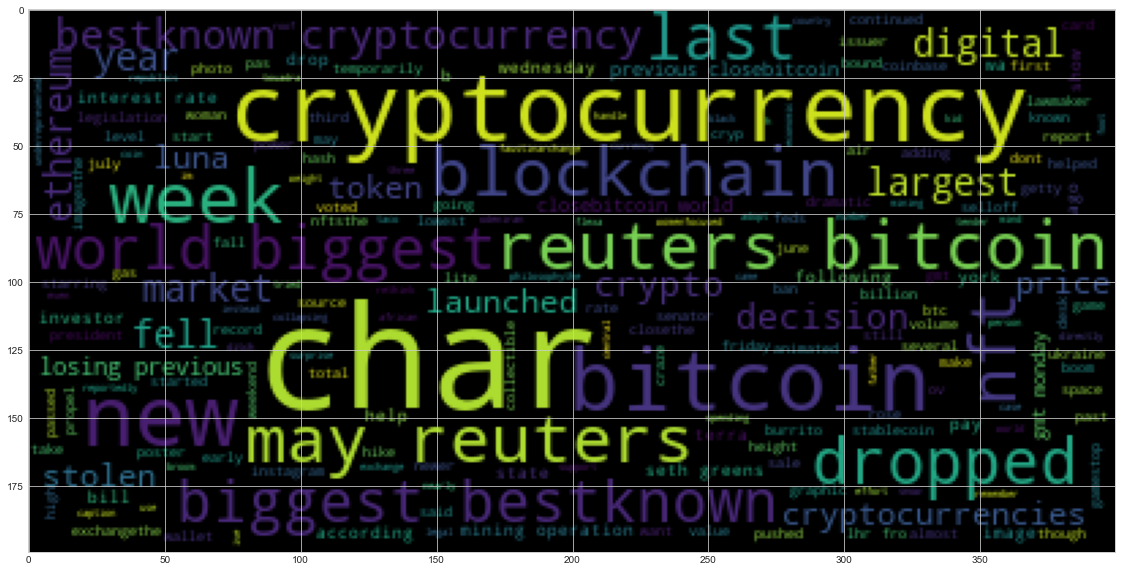

In [144]:
# Generate the Bitcoin word cloud
btc_all_in = " ".join([str(word) for word in btc_tokenized_list])
wc_btc = WordCloud().generate(btc_all_in)
plt.imshow(wc_btc)

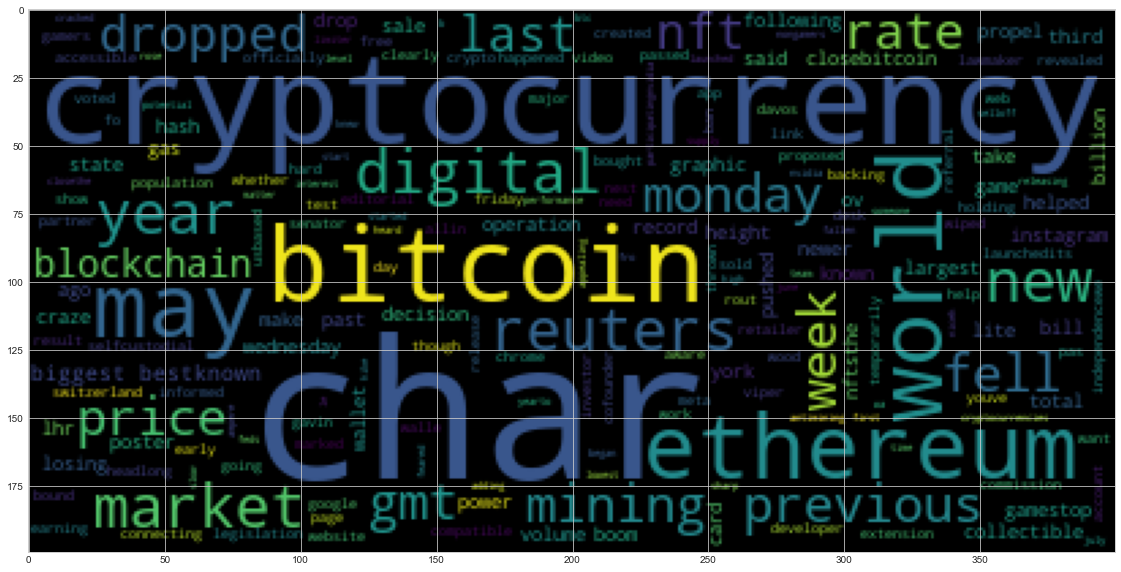

In [145]:
# Generate the Ethereum word cloud
eth_all_in = " ".join([str(word) for word in eth_tokenized_list])
wc_eth = WordCloud().generate(eth_all_in)
plt.imshow(wc_eth)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [146]:
import spacy
from spacy import displacy

In [147]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [148]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [183]:
# Concatenate all of the Bitcoin text together
btc_text_tgthr = []
for text in bitcoin_news_df.text:
    btc_text_tgthr.append(text)

btc_paragraphs = ''.join([str(word) for word in btc_text_tgthr])

In [184]:
# Run the NER processor on all of the text
btc = nlp(btc_paragraphs)

# Add a title to the document
btc.user_data["title"] = "Bitcoin NER"

In [185]:
# Render the visualization
displacy.render(btc, style='ent')

In [200]:
# List all Bitcoin Entities
ent_labels=[]
entities=[]

for ent in btc.ents:
    ent_labels.append(ent.label_)
    entities.append(ent.text)
btc_entities = pd.DataFrame([entities, ent_labels]).T
btc_entities.columns=["word", "entity"]
btc_entities

,word,entity
0,New York,GPE
1,Friday,DATE
2,36-27,CARDINAL
3,Odeniran,GPE
4,Faustin-Archange Touadéra,LAW
...,...,...
66,Seth Green's,PERSON
67,Nike,ORG
68,today,DATE
69,Seth Green's,PERSON


---

### Ethereum NER

In [195]:
# Concatenate all of the Ethereum text together
eth_text_tgthr = []
for text in ethereum_news_df.text:
    eth_text_tgthr.append(text)

eth_paragraphs = ''.join([str(word) for word in eth_text_tgthr])

In [196]:
# Run the NER processor on all of the text
eth = nlp(eth_paragraphs)

# Add a title to the document
eth.user_data["title"] = "Ethereum NER"


In [197]:
# Render the visualization
displacy.render(eth, style='ent')

In [201]:
# List all Entities
ent_labels=[]
entities=[]

for ent in eth.ents:
    ent_labels.append(ent.label_)
    entities.append(ent.text)
eth_entities = pd.DataFrame([entities, ent_labels]).T
eth_entities.columns=["word", "entity"]
eth_entities

,word,entity
0,Meta,ORG
1,Instagram,ORG
2,US,GPE
3,Instagram,ORG
4,chars]GameStop,ORG
...,...,...
76,6,CARDINAL
77,New York's,GPE
78,Ukraine,GPE
79,Ethereum,ORG


---